# Day 23

In [3]:
from collections import defaultdict

def parse23(filename,verbose=False):
    with open(filename) as f:
        grid = [ l.strip() for l in f.readlines() ]
        if verbose:
            for r in grid:
                print(r)
        elfs = defaultdict(int)
        for r in range(len(grid)-1,0,-1):
            for x in range(len(grid[0])):
                if grid[r][x]=="#":
                    y = len(grid)-r-1
                    elfs[(x,y)] = 1
        return elfs

In [4]:
elfs = parse23("examples/example23_1.txt")
elfs

defaultdict(int, {(2, 1): 1, (3, 1): 1, (2, 3): 1, (2, 4): 1, (3, 4): 1})

In [5]:
import numpy as np

def elfs2grid(elfs):
    X = [x for x,y in elfs.keys() if elfs[(x,y)]==1 ]
    Y = [y for x,y in elfs.keys() if elfs[(x,y)]==1 ]
    xmin,xmax = min(X),max(X)
    ymin,ymax = min(Y),max(Y)
    grid = np.zeros((ymax-ymin+1,xmax-xmin+1))
    for x,y in elfs.keys():
        if elfs[(x,y)]==1:
            grid[y-ymin][x-xmin]=1
    return grid

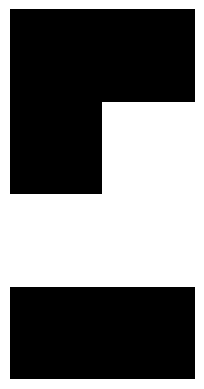

In [6]:
import matplotlib.pyplot as plt

grid = elfs2grid(elfs)

plt.imshow(grid,origin="lower",cmap='binary')
_ = plt.axis('off')

In [7]:
dirs = (
    (-1,+1), # NW
    ( 0,+1), # N
    (+1,+1), # NE
    (+1, 0), # E
    (+1,-1), # SE
    ( 0,-1), # S
    (-1,-1), # SW
    (-1, 0), # W
)

def checkAround(E,elfs):
    x,y = E
    around = [ elfs[(x+dx,y+dy)] for dx,dy in dirs ]
    canMove = sum(around)>0
    #around = [1,2,3,4,5,6,7,8]
    N = around[0:3]
    S = around[4:7]
    W = around[6:]+[around[0]]
    E = around[2:5]
    canMoveN = sum(N)==0
    canMoveS = sum(S)==0
    canMoveW = sum(W)==0
    canMoveE = sum(E)==0
    return canMove, (canMoveN,canMoveS,canMoveW,canMoveE)

In [8]:
checkAround((2,4),elfs)

(True, (True, False, True, False))

In [9]:
from collections import Counter
from copy import deepcopy

dest = ( (0,+1), # N
         (0,-1), # S
         (-1,0), # W
         (+1,0)  # E 
        )

def moveElfs(_elfs,Nrounds=0):
    elfs = deepcopy(_elfs)
    dirStart = 0 # first direction to check
    iround = 0
    while True:

        # check proposed moves for all elfs that can move
        proposedMove = {}
        elfsPos = [E for E,v in elfs.items() if v ]
        for E in elfsPos:
            if elfs[E]==1:
                canMove, directions = checkAround(E,elfs)
                canN, canS, canE, canW = directions
                if canMove and (canN or canS or canW or canE):
                    willGo = dirStart
                    while True:
                        if directions[willGo]:
                            break
                        willGo = (willGo+1)%4
                    x,y = E
                    proposedMove[E] = (x+dest[willGo][0],y+dest[willGo][1] )

        # if no elf can move, end process
        if len(proposedMove.keys())==0:
            return elfs
 
        # check if more than one elf wants to move to same position
        count = Counter([ p for e,p in proposedMove.items() ])

        # list elfs that can actually move
        elfsWillMove = {}
        for e,p in proposedMove.items():
            if count[p]==1:
                elfsWillMove[e] = p

        # move elfs
        for E in elfsPos:
            if E in elfsWillMove.keys():
                elfs[E] = 0
                elfs[elfsWillMove[E]] = 1

        # update preferred direction for next round
        dirStart = (dirStart+1)%4
        
        iround += 1
        if Nrounds and iround==Nrounds:
            return elfs

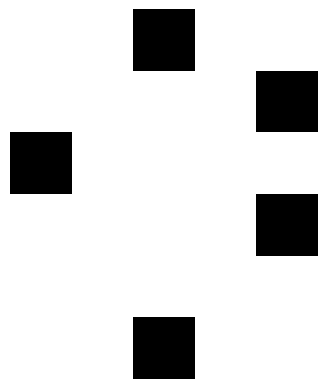

In [10]:
elfs0 = parse23("examples/example23_1.txt")

elfs0end = moveElfs(elfs0)
grid0 = elfs2grid(elfs0end)
plt.imshow(grid0,origin="lower",cmap="binary")
_ = plt.axis('off')

In [13]:
def part1(elfs):
    elfsEnd1 = moveElfs(elfs,Nrounds=10)
    gridEnd1 = elfs2grid(elfsEnd1)
    return len(gridEnd1[gridEnd1==0]),gridEnd1

Test 1: 110


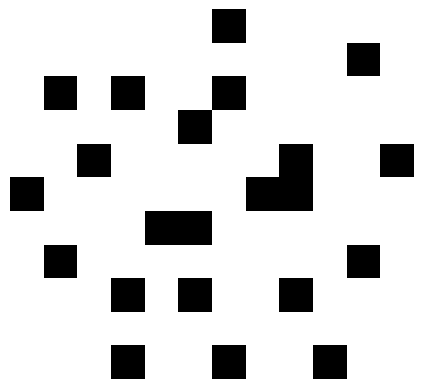

In [14]:
elfs1 = parse23("examples/example23_2.txt")
test1,gridTest1 = part1(elfs1)
print("Test 1:",test1)

plt.imshow(gridTest1,origin="lower",cmap="binary")
_ = plt.axis('off')

In [15]:
elfs = parse23("../AOC2022inputs/input23.txt")
sol1,grid1 = part1(elfs)
print("Part 1:",sol1) # 4288 too low

Part 1: 4288


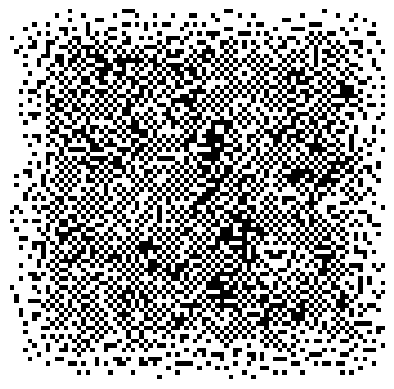

In [16]:
plt.imshow(grid1,origin="lower",cmap="binary")
_ = plt.axis('off')

In [19]:
len(grid1[grid1==1])

2684

In [20]:
len(elfs.keys())

2684